<a href="https://colab.research.google.com/github/ydeng-MLM/MLM_Lab_Miscellaneous/blob/main/MLM_Lab_Figure_Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
def read_CST(fname, single=True):
  if single:
    df = pd.read_csv(fname, sep='\t', header=2)
    ans = df.to_numpy()
    return ans
  
  dataIn = pd.read_csv(fname, sep='                ', names=['Frequency', 'Value'])
  freqUnit = 'THz'
  dataIn.columns = ['Frequency (' + freqUnit + ')', 'Value']

  headerData = dataIn[dataIn.isnull().any(axis=1)]
  #headerData = headerData[::2]

  starts = np.array(headerData.index.values) + 1
  ends = np.append(np.array(headerData.index.values)[1:] -1,dataIn.shape[0])

  exportRowIndices = []
  for start, end in zip(starts, ends):
      exportRowIndices.append([start, end])

  justCurves = []
  for exportRowIndex in exportRowIndices:
    newCurve= dataIn.iloc[exportRowIndex[0]:exportRowIndex[1], 1].values
    justCurves.append(newCurve)

  curveLengths = [len(curve) for curve in justCurves]
  minCurveLength = np.min(curveLengths)
  justCurvesPared = []
  for curve in justCurves:
    justCurvesPared.append(curve[:minCurveLength])
  justCurvesPared = np.array(justCurvesPared)
  justCurvesPared = justCurvesPared.astype(np.float)

  freqs = dataIn.iloc[exportRowIndices[0][0]:exportRowIndices[0][1], :1].values
  freqs = [item for sublist in freqs for item in sublist][:minCurveLength]

  return justCurvesPared

In [ ]:
R_cp = read_CST('R_CP.txt', single=False)
print(R_cp.shape)
R_te = read_CST('R_TE.txt', single=False)
T_cp = read_CST('T_CP.txt', single=False)
T_te = read_CST('T_TE.txt', single=False)

(5, 2001)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  import sys


In [ ]:
print(R_cp[0])

[2.1241536e-05 2.0895783e-05 2.0553235e-05 ... 7.2235989e-07 6.6163810e-07
 6.0516634e-07]


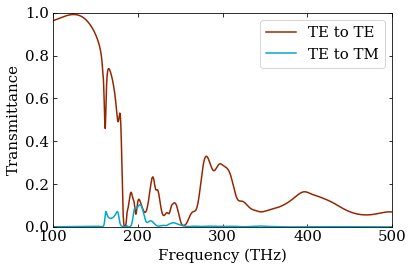

In [ ]:
freq = np.linspace(100, 500, len(R_cp[0]))

plt.rc('font', family='serif', size='15')

fig, ax1 = plt.subplots()

ax1.tick_params(direction="in", bottom=True, top=True, left=True, right=True, labelsize=15)
ax1.set_xlabel('Frequency (THz)')
ax1.set_ylabel('Transmittance')
a, = ax1.plot(freq, T_te[1], '#952500')
b, = ax1.plot(freq, T_cp[1], color='#00a7c9')
ax1.set_ylim([0, 1])
ax1.set_xlim([100, 500])
#ax1.text(120, 0.9, "(a)")
#ax1.yaxis.tick_right()
#ax1.yaxis.set_label_position("right")


com = [a, b]
ax1.legend(com, ['TE to TE', 'TE to TM'], loc='upper right', fontsize=15)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.set_size_inches(6, 4)
plt.show()

#fig.savefig('forward_1.svg', dpi=300)

In [ ]:
plt.plot(freq,int(R_cp[0])

SyntaxError: ignored

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'S31')

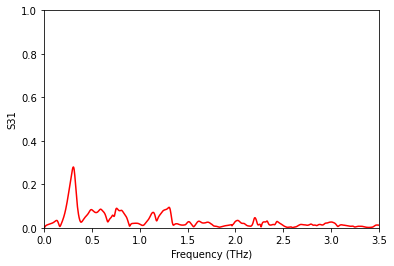

In [ ]:
s31 = read_CST('/content/pixel_active_s31.txt', single=True)

freq = np.linspace(0, 3.5, len(s31))

plt.figure()
plt.plot(freq,s31, 'r')
plt.xlim([0, 3.5])
plt.ylim([0, 1])
plt.xlabel('Frequency (THz)')
plt.ylabel('S31')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Absorptivity')

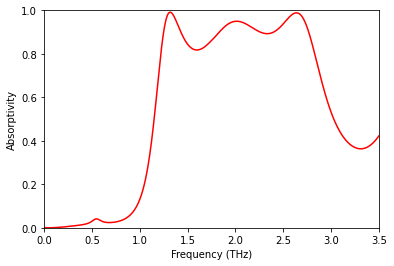

In [ ]:
s31 = read_CST('temp.txt', single=True)

freq = np.linspace(0, 3.5, len(s31))

plt.figure()
plt.plot(freq,s31, 'r')
plt.xlim([0, 3.5])
plt.ylim([0, 1])
plt.xlabel('Frequency (THz)')
plt.ylabel('Absorptivity')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


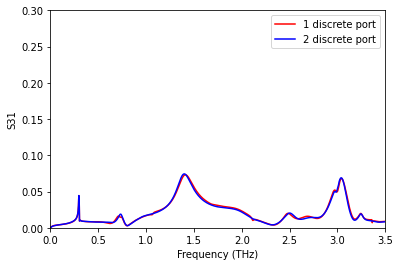

In [ ]:
s31 = read_CST('s31_trans3.txt', single=True)
ref = read_CST('s31_trans4.txt', single=True)

freq = np.linspace(0, 3.5, len(s31))
freq1 = np.linspace(0, 3.5, len(ref))

plt.figure()
plt.plot(freq,s31, 'r')
plt.plot(freq1,ref, 'b')
plt.xlim([0, 3.5])
plt.ylim([0, 0.3])
plt.xlabel('Frequency (THz)')
plt.ylabel('S31')
plt.legend(['1 discrete port', '2 discrete port'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


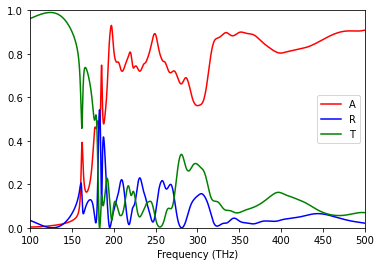

In [ ]:
A = read_CST('ate.txt', single=True)
R = read_CST('rte.txt', single=True)
T = read_CST('tte.txt', single=True)

freq = np.linspace(100, 500, len(s31))
freq1 = np.linspace(100, 500, len(ref))

plt.figure()
plt.plot(freq, A, 'r')
plt.plot(freq1, R, 'b')
plt.plot(freq1, T, 'G')
plt.xlim([100, 500])
plt.ylim([0, 1])
plt.xlabel('Frequency (THz)')
#plt.ylabel('ab.u')
plt.legend(['A', 'R', 'T'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


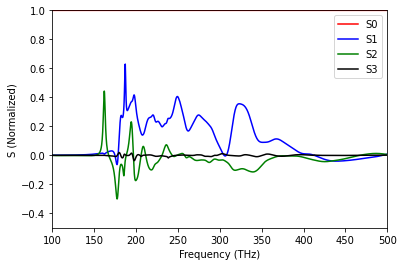

In [ ]:
s0 = read_CST('s0.txt', single=True)
s0 = s0/s0
s1 = read_CST('s1.txt', single=True)/s0
s2 = read_CST('s2.txt', single=True)/s0
s3 = read_CST('s3.txt', single=True)/s0

freq0 = np.linspace(100, 500, len(s0))
freq1 = np.linspace(100, 500, len(s1))
freq2 = np.linspace(100, 500, len(s2))
freq3 = np.linspace(100, 500, len(s3))

plt.figure()
plt.plot(freq1,s0, 'r')
plt.plot(freq1,s1, 'b')
plt.plot(freq1,s2, 'g')
plt.plot(freq1,s3, 'k')
plt.xlim([100, 500])
plt.ylim([-0.5, 1])
plt.xlabel('Frequency (THz)')
plt.ylabel('S (Normalized)')
plt.legend(['S0', 'S1', 'S2','S3'])

a = np.asarray([freq1, s0[:,0], s1[:,0], s2[:,0], s3[:,0]])
a = a.T
np.savetxt("Stokes_parameters_freq_dep.csv", a, delimiter=",", fmt='%1.6f', header="freq, S0, S1, S2, S3")

[[0.00924738]
 [0.00925078]
 [0.00926835]
 ...
 [0.62363919]
 [0.62336437]
 [0.62316489]]
[2.98426313e-05] [3.25496573e-05] [3.29100444e-06] [1.13045398e-06]


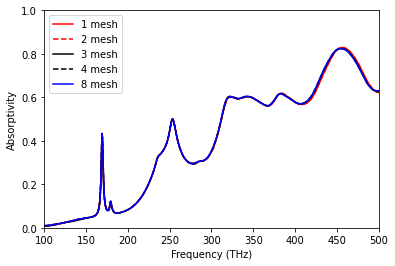

In [ ]:
m1 = read_CST('1m.txt', single=True)
m2 = read_CST('2m.txt', single=True)
m3 = read_CST('3m.txt', single=True)
m4 = read_CST('4m.txt', single=True)
m8 = read_CST('8m.txt', single=True)

freq = np.linspace(100, 500, len(m1))

print(m1)

mse1 = (np.square(m1 - m8)).mean(axis=0)
mse2 = (np.square(m2 - m8)).mean(axis=0)
mse3 = (np.square(m3 - m8)).mean(axis=0)
mse4 = (np.square(m4 - m8)).mean(axis=0)

print(mse1, mse2, mse3, mse4)

plt.figure()
plt.plot(freq,m1, 'r')
plt.plot(freq,m2, 'r--')
plt.plot(freq,m3, 'k')
plt.plot(freq,m4, 'k--')
plt.plot(freq,m8, 'b')
plt.xlim([100, 500])
plt.ylim([0, 1])
plt.xlabel('Frequency (THz)')
plt.ylabel('Absorptivity')
plt.legend(['1 mesh', '2 mesh', '3 mesh', '4 mesh', '8 mesh'])

In [ ]:
mse1 = (np.square(m4 - m8)).mean(axis=0)
mse

array([1.13045398e-06])

In [ ]:
R_TE = read_CST('R_TE_500.txt', single=False)
T_TE = read_CST('T_TE_500.txt', single=False)
R_CP = read_CST('R_CP_500.txt', single=False)
T_CP = read_CST('T_CP_500.txt', single=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  import sys


In [ ]:
R_TE = read_CST('R_TE_5.txt', single=False)
T_TE = read_CST('T_TE_5.txt', single=False)
R_CP = read_CST('R_CP_5.txt', single=False)
T_CP = read_CST('T_CP_5.txt', single=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  import sys


0.008049043840925424 0.0114158582294601 0.4129531341665481
2.867479145686757e-08 2.5352644032600198e-08 0.5802755735859284


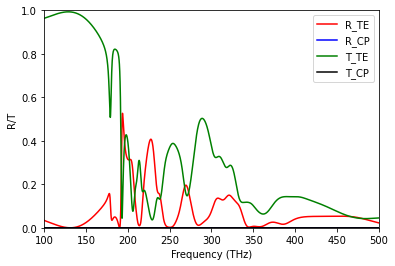

In [ ]:
freq1 = np.linspace(100, 500, len(R_TE[0]))

A_TE = 1-R_TE-T_TE
A_CP = A_TE-R_CP-T_CP

per_R = R_CP.mean(axis=1)
per_T = T_CP.mean(axis=1)
per_A = A_CP.mean(axis=1)

avg_R = np.mean(per_R)
avg_T = np.mean(per_T)
avg_A = np.mean(per_A)

print(avg_R, avg_T, 1-avg_A)
i = np.argmin(per_R)
print(per_R[i], per_T[i], per_A[i])

plt.figure()
plt.plot(freq1,R_TE[i], 'r')
plt.plot(freq1,R_CP[i], 'b')
plt.plot(freq1,T_TE[i], 'g')
plt.plot(freq1,T_CP[i], 'k')
plt.xlim([100, 500])
plt.ylim([0, 1])
plt.xlabel('Frequency (THz)')
plt.ylabel('R/T')
plt.legend(['R_TE', 'R_CP', 'T_TE','T_CP'])

#a = np.asarray([freq1, s0[:,0], s1[:,0], s2[:,0], s3[:,0]])
##a = a.T
#np.savetxt("Stokes_parameters_freq_dep.csv", a, delimiter=",", fmt='%1.6f', header="freq, S0, S1, S2, S3")

Text(0, 0.5, 'Count')

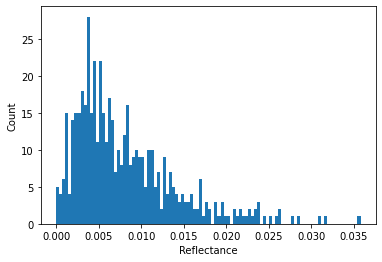

In [ ]:
plt.figure()
_ = plt.hist(per_R, bins=100)
plt.xlabel('Reflectance')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

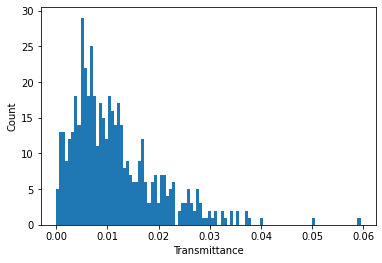

In [ ]:
plt.figure()
_ = plt.hist(per_T, bins=100)
plt.xlabel('Transmittance')
plt.ylabel('Count')

-0.023091328174912582
0.5997629686466767


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Transmittance difference')

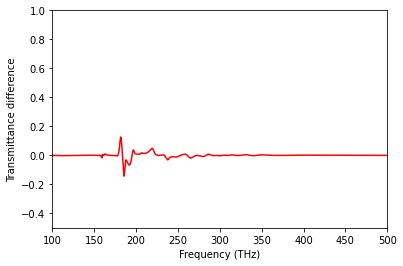

In [ ]:
t2 = read_CST('diff_t2.txt', single=True)
t5 = read_CST('diff_t5.txt', single=True)

freq = np.linspace(100, 500, len(t2))

t = t5-t2


print(100*np.mean((t)))
print(100*np.mean(np.abs(t)))

plt.figure()
plt.plot(freq,t, 'r')
#plt.plot(freq,t5, 'b')
plt.xlim([100, 500])
plt.ylim([-0.5, 1])
plt.xlabel('Frequency (THz)')
plt.ylabel('Transmittance difference')
#plt.legend(['A_TE', 'A_CP'])

[0.00083401]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


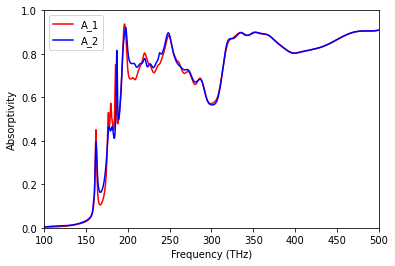

In [ ]:
ate = read_CST('a1.txt', single=True)
acp = read_CST('a5.txt', single=True)

freq = np.linspace(100, 500, len(ate))

mse = (np.square(ate - acp)).mean(axis=0)

print(mse)

plt.figure()
plt.plot(freq,ate, 'r')
plt.plot(freq,acp, 'b')
plt.xlim([100, 500])
plt.ylim([0, 1])
plt.xlabel('Frequency (THz)')
plt.ylabel('Absorptivity')
plt.legend(['A_1', 'A_2'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


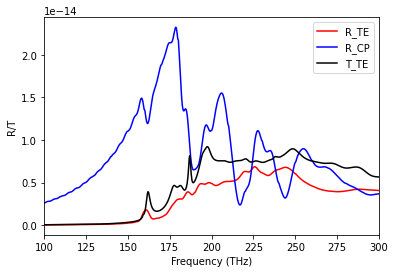

In [ ]:
A = read_CST('absorptivity.txt', single=True)
loss = read_CST('loss.txt', single=True)
scatter = read_CST('scattered.txt', single=True)

freq1 = np.linspace(100, 500, len(loss))



plt.figure()
plt.plot(freq1,loss, 'r')
plt.plot(freq1,scatter, 'b')
plt.plot(freq,1e-14*A, 'k')
plt.xlim([100, 300])
#plt.ylim([0, 1])
plt.xlabel('Frequency (THz)')
plt.ylabel('R/T')
plt.legend(['R_TE', 'R_CP', 'T_TE','T_CP'])

a = np.asarray([freq1, loss[:,0], scatter[:,0]])
a = a.T
np.savetxt("diffraction_rcs_study.csv", a, delimiter=",", fmt='%.6e', header="freq, loss power (W), scatter power(W)")

In [ ]:
freq = np.linspace(100, 500, len(A))


a = np.asarray([freq, A[:,0]])
a = a.T
np.savetxt("absorptivity.csv", a, delimiter=",", fmt='%.6e', header="freq, absorptivity(ab.u.)")